## Library

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

## Data processing

### Load Data

In [84]:
anime_df = pd.read_csv('data/anime.csv')
rating_df = pd.read_csv('data/rating.csv')
print('anime Shape', anime_df.shape)
print('rating Shape', rating_df.shape)

anime Shape (12294, 7)
rating Shape (7813737, 3)


In [85]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


## Anime.csv

- **anime_id**: myanimelist.net's unique id identifying an anime.
- **name**: full name of anime.
- **genre**: comma separated list of genres for this anime.
- **type**: movie, TV, OVA, etc.
- **episodes**: how many episodes in this show. (1 if movie).
- **rating**: average rating out of 10 for this anime.
- **members**: number of community members that are in this anime's "group".

In [86]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


## Rating.csv

- **user_id**: non identifiable randomly generated user id.
- **anime_id**: the anime that this user has rated.
- **rating**: rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).


In [87]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [88]:
anime_df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [89]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [90]:
rating_df.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


### anime_df Missing Values

In [91]:
print('anime_df MISSING VALUES:')
print(anime_df.isnull().sum())

anime_df MISSING VALUES:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


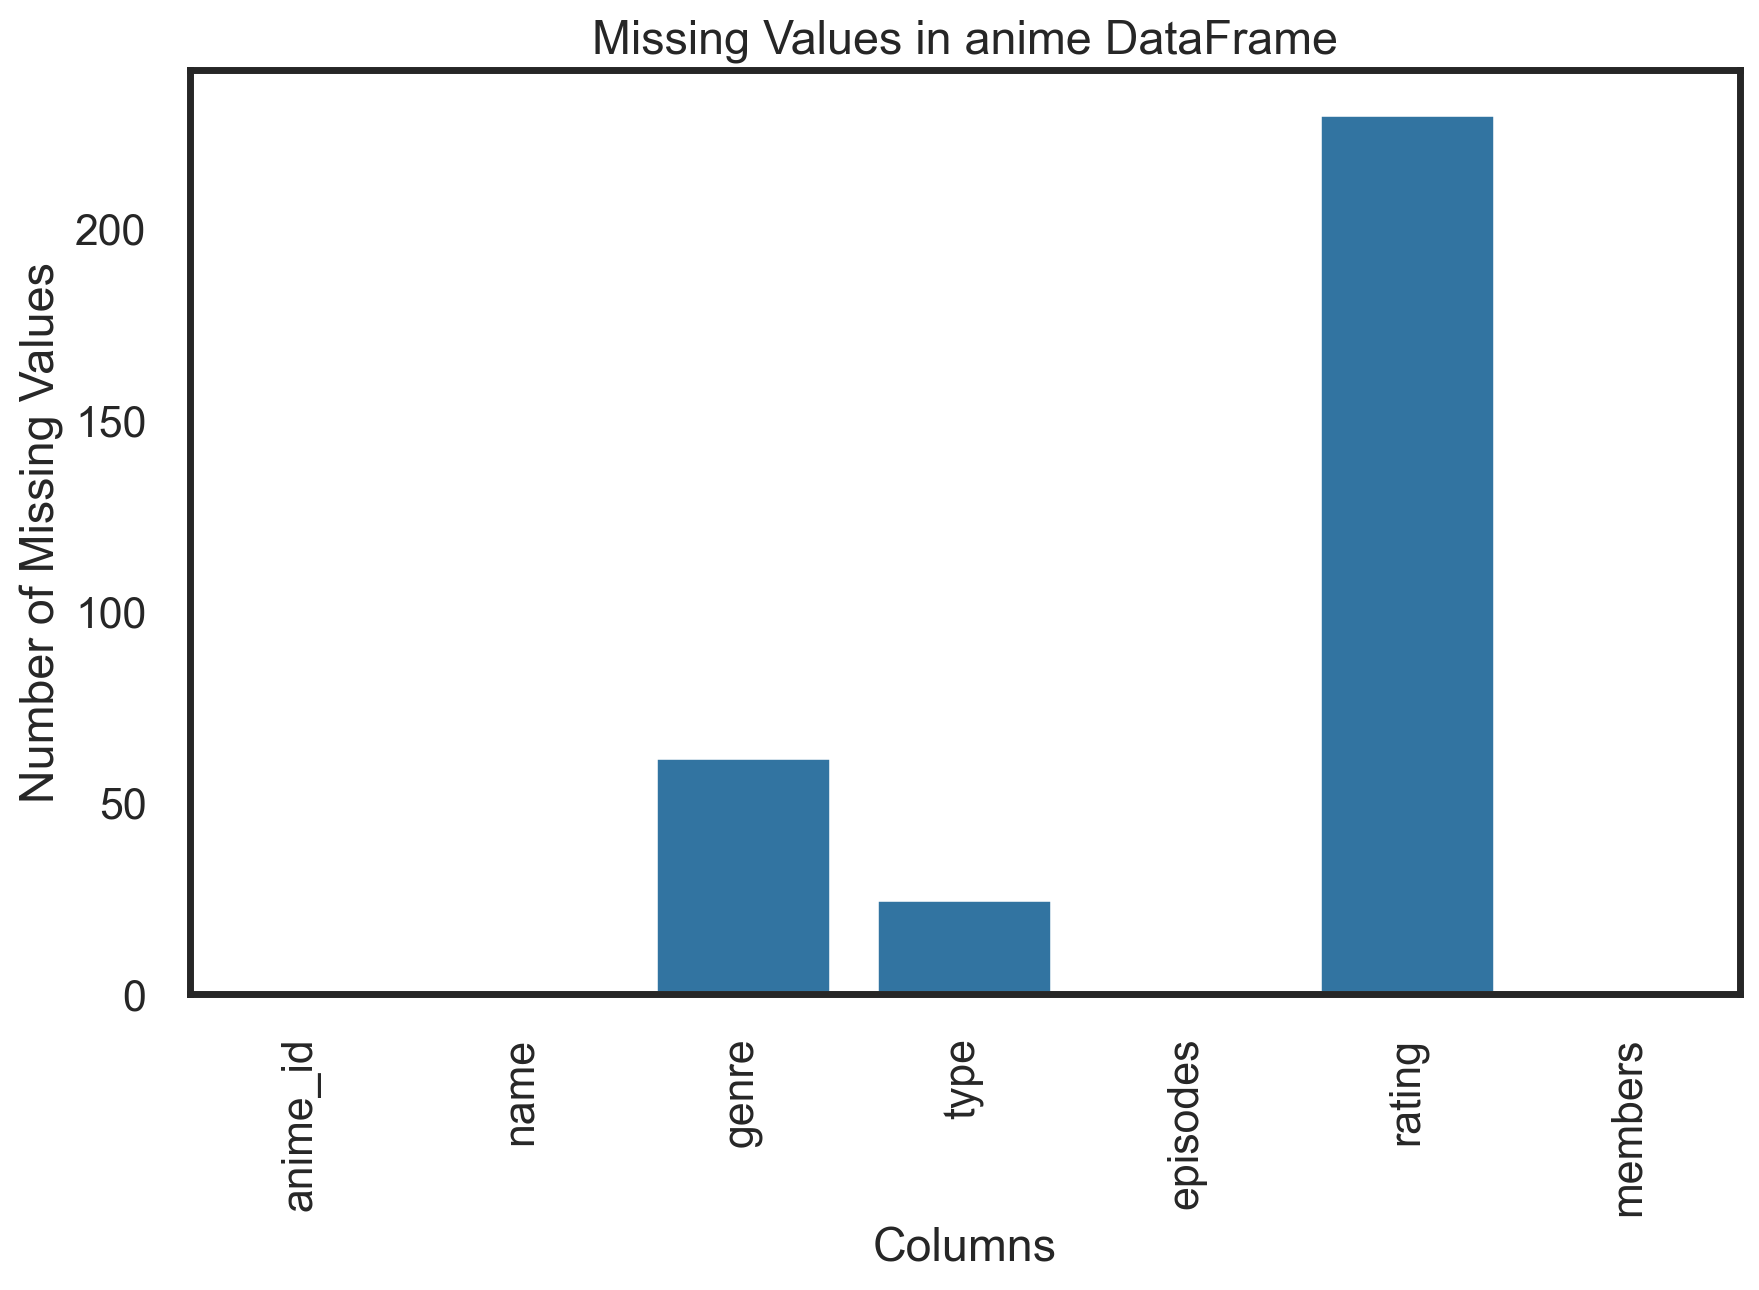

In [92]:
anime_missing_values = anime_df.isnull().sum()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=anime_missing_values.index, y=anime_missing_values.values)
plt.title('Missing Values in anime DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

### Missing anime_df values processing

#### Row has null value

In [93]:
anime_df_null = anime_df[anime_df.isnull().any(axis=1)]
anime_df_null

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,79
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


#### This null values can filling so i will blalalala them

##### 1. null genre processing

In [96]:
anime_df_null_genre = anime_df_null[anime_df_null['genre'].isnull()]
anime_df_null_genre

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607
...,...,...,...,...,...,...,...
11070,32032,Seikaisuru Kado,NaN,NaN,Unknown,NaN,1797
11086,34310,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...,NaN,Movie,1,NaN,51
11097,34474,Tsukipro The Animation,NaN,TV,Unknown,NaN,843
11112,33035,Yuyushiki Special,NaN,Special,1,NaN,2294


In [76]:
anime_df.dropna(inplace=True)

#### Check again

In [77]:
anime_df[anime_df.isnull().any(axis=1)]

,anime_id,name,genre,type,episodes,rating,members


### rating_df Missing Values

In [78]:
print('rating_df NULL VALUES:')
print(rating_df.isnull().sum())

rating_df NULL VALUES:
user_id     0
anime_id    0
rating      0
dtype: int64


### Duplicates

In [79]:
print(f'Duplicates in anime set: {anime_df.duplicated().sum()}')
print('')
print(f'Duplicates in rating set: {rating_df.duplicated().sum()}')

# Hiển thị các bản ghi trùng lặp
print('Duplicate records in anime set:')
print(anime_df[anime_df.duplicated()])

print('Duplicate records in rating set:')
print(rating_df[rating_df.duplicated()])

Duplicates in anime set: 0

Duplicates in rating set: 1
Duplicate records in anime set:
Empty DataFrame
Columns: [anime_id, name, genre, type, episodes, rating, members]
Index: []
Duplicate records in rating set:
         user_id  anime_id  rating
4499316    42653     16498       8


In [80]:
anime_df.drop_duplicates(inplace=True)
rating_df.drop_duplicates(inplace=True)

# Kiểm tra lại sau khi xóa trùng lặp
print(f'After removing duplicates, records in anime set: {anime_df.duplicated().sum()}')
print('')
print(f'After removing duplicates, records in rating set: {rating_df.duplicated().sum()}')

After removing duplicates, records in anime set: 0

After removing duplicates, records in rating set: 0


## Analyst

In [81]:
###